# What is TensorFlow?

TensorFlow is a software library used for machine learning applications, especially deep learning. It uses symbolic mathematics (instead of purely numerical computations), which enables it to perform operations like automatic differentiation on a computational graph such as a neural network. Another major benefit is its ability to perform computations on GPU hardware, potentially leading to large speedups. TensorFlow is one of the most popular libraries available for this purpose; other similar libraries include PyTorch, Chainer, Apache MXNet, Caffe and Microsoft CNTK.

TensorFlow was developed by Google Brain and version 1.0.0 was released in 2017. It emerged from an earlier proprietary framework called DistBelief. 

TensorFlow is released as open source software, and has an active community of contributors and users. 

The latest release of TensorFlow 2 makes use of the Keras API as the default high-level abstraction to easily construct and customize neural networks, forgetting about the nitty-gritty algorithms written in C++ that are running behind the scenes. This greatly simplifies the numerical implementation for the user, resulting in a faster and intuitive algorithm implementation. You just need a few lines of code to define a cutting-edge convolutional network. 

Another fundamental feature of TensorFlow is its ability to develop and deploy models in multiple platforms and environments.  If you want to deploy on mobile and embedded devices then you can choose TensorFlow Lite. This means that TensorFlow is aiming to ensure the portability and scalability of the software, thus paving the way towards a future where any device could make use of neural networks while receiving information from IoT sensors and cloud servers. There are now indeed several chipsets whose aim is solely to execute neural networks, such as the TPU from Google or the FSD chip from Tesla.

The [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf) can be found online. 

In [1]:
# Let's start importing Tensorflow

import tensorflow as tf

In [2]:
# Check its version

tf.__version__

'2.0.0'

# CNN classifier for the MNIST dataset
We will revisit the neural network built to recognise handwritten digits, this time using Tensorflow.   
We can see how to build, compile and fit a convolutional neural network (CNN) model to the MNIST dataset of images of handwritten digits.
  
## The MNIST dataset

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models.   

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

And is available inside Tensorflow!  
The goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

## The Keras API
In TensorFlow 2 a big
drive is being towards ease of use. At the highest level,
the easiest way to start building deep learning models in TensorFlow
is to use the **Keras API**, and that's what we're going
to focus on.  

The Keras Projects was
authored by Francois Chollet and it's a high-level neural
networks API developed with the specific goal of
making it easy to build and infer from
deep learning models. It was developed
as an API without the backend and actually supports multiple
backend implementations. In TensorFlow 2, it's been
adopted as the high level API. Despite being high
level and easy to use, it's still very flexible; probably 99 percent of whatever you want to do, you can achieve it
using the Keras API.  
  
You can visit the [Keras
homepage](keras.io), where can read more about the Keras Project and its
development principles. 
When you install TensorFlow 2, you get all of this packaged
up as part of the library in the namespace,
TensorFlow.Keras. 

## Load the data

In [3]:
# load the MNIST data directly from Tensorflow Keras

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [4]:
len(train_images) # train and test datasets are numpy arrays

60000

In [5]:
len(test_images)

10000

As you can see, the dataset is already available as a training and a testing set, no need to split them.  
Let's have a look at one image and its label:

Label: this is a  7


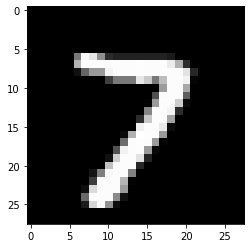

In [6]:
import matplotlib.pyplot as plt    # to plot images
%matplotlib inline


   # Example of a picture
indexImage = 4000  # try any index between 0 and 59999.
 
plt.imshow(train_images[indexImage], cmap='gray');
print ("Label: this is a ", train_labels[indexImage])

In [7]:
train_images.shape

(60000, 28, 28)

Images are 28 x 28 pixels.

## Preprocess the data

First, let's preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.  
This is all we need, the one hot encoding of the target variable is already done in the dataset.

In [8]:
import numpy as np

# takes in the training and test images as loaded in the cell above, and scales them
# so that they have minimum and maximum values equal to 0 and 1 respectively.
    
scaled_train_images = train_images / np.amax(train_images)
scaled_test_images  = test_images / np.amax(test_images) 

In [9]:
# Add a dummy channel dimension (needed for convolutional layer)

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [10]:
scaled_train_images[0].shape

(28, 28, 1)

## First CNN model

We start simple, like our previous example. Our neural network has 3 layers: an input layer, a hidden layer and an output layer.  
You'll find that most of the neural networks
that you work with, can be built using
the basic Keras classes such as the **sequential class**.  
It's a really easy
and intuitive way to construct deep
learning models.  
The way we build the 
model is really simple: we just create an instance
of the sequential class and then we pass in a
list of Keras layers.  
Layers are the buidling blocks of neural networks in Keras. https://keras.io/api/layers/
  
The Sequential class could be used to build simple neural
networks, feed-forward networks which are also called
Multilayer Perceptrons or MLPs.  
But here we'll see how to build
convolutional neural networks by including convolutional and
pooling layers in our model.
  
### Convolutional Neural Network
In deep learning, a [convolutional neural network (CNN, or ConvNet)](https://en.wikipedia.org/wiki/Convolutional_neural_network) is a class of deep neural networks, most commonly applied to analysing visual imagery    
The name “convolutional neural network” indicates that the network employs a mathematical operation called convolution. CNNs use convolution in place of general matrix multiplication in at least one of their layers.  
  
The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction.  
The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image.  
#### Input: the convolutional layer
In a CNN, the input is a tensor with shape (number of images) x (image height) x (image width) x (input channels). After passing through a convolutional layer, the image becomes abstracted to a feature map.     
#### The pooling layer
Convolutional networks may include local or global pooling layers to streamline the underlying computation. Pooling layers reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Local pooling combines small clusters, typically 2 x 2.  
There are two common types of pooling: max and average. Max pooling uses the maximum value of each cluster of neurons at the prior layer, while average pooling instead uses the average value.  
  
The Pooling layer is therefore responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training of the model.
  
### Build the first CNN model

In [11]:
from tensorflow.keras.models import Sequential # Sequential model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D # layers

In [12]:
# Build the Sequential convolutional neural network model

CNNModel = Sequential([
    Conv2D(filters = 8, kernel_size=(3,3), padding= 'SAME', activation='relu', 
           name = 'Convolution', input_shape=scaled_train_images[0].shape),
    MaxPooling2D((2,2), name = 'Pooling'),
    Flatten(name = 'InputFlattening'),
    Dense(25, activation='relu', name = 'hiddenLayer'),
    Dense(10, activation='softmax', name='outputLayer')])

In this model, I'm importing four layer types. You can see that I'm making the first layer a [convolution](https://keras.io/api/layers/convolution_layers/) together with a pooling and the flatten layer.  

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. It has two required arguments: the first is the the dimensionality of the output space (i.e. the number of output filters in the convolution) and we define 8 filters in this layer.  
  
And the second is the shape
of the convolutional kernel: an integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. 

Why is it that you need an input shape of 28
times 28 times 1, and not just 28 times 28? Well, you can try to see what happens when you remove that one. It in deed seems that
an error pops up. This is due to the
input requirements of the conv2d layer, since that one is necessary and indicates the number of
channels in our input. 

One thing you might have
noticed is that we explicitly tell the model what shape the input data
will be at the build stage. 
I'm giving explicitly 
the input shape to the first layer in my model so that the weights and biases are created when I define
the model instance. 
Now in this case, the weights and biases will be created and initialized
straight away. 

Alternatively, you can not saying what size or shape
the input is going to be and leave the creation of weights and biases until
the training stage when you feed the data into the model. 

So, our kernel is
convolving over the input image with a window of 3 by 3
pixels using 8 filters. We're also passing the output
through a *relu* activation function.
Finally, the *SAME* padding just makes sure that the spatial dimensions don't change.

The second layer is a MaxPooling layer. This layer has one required argument,
which is the pooling window size. And that's also 3 by 3 pixels.
  
The
input shape is two-dimensional and that's why I'm flattening (unrolling) each data
input to unroll it into a long one-dimensional
vector ready to be passed
through to the final two Dense layers.


You can see that when you
create a dense layer, you always have to say how many units should
be in that layer. That's the first argument. You can also optionally pass in an activation like
 here, so the hidden layer
has a *relu* activation. If you don't pass in
anything for the activation, the dense layer will have a linear activation or no
activation by default.  

The output layer has 10 units and is using a
*softmax* activation. This
is a model for a classification task
where they're 10 classes.  
  
Note that I have named each layer. This is totally optional.  
    
So now you've seen how one way to
build sequential models. An alternative way would be - instead of passing
in a list of layers - to use the *model.add()* method to append additional
layers to the model. 

In [13]:
# Print the model summary

CNNModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution (Conv2D)         (None, 28, 28, 8)         80        
_________________________________________________________________
Pooling (MaxPooling2D)       (None, 14, 14, 8)         0         
_________________________________________________________________
InputFlattening (Flatten)    (None, 1568)              0         
_________________________________________________________________
hiddenLayer (Dense)          (None, 25)                39225     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                260       
Total params: 39,565
Trainable params: 39,565
Non-trainable params: 0
_________________________________________________________________


Printing 
the summary of the model you can see for each layer its given name, type, the tensor's output size and how many parameters has.  

After being processed by
the convolutional layer, the input
shape of 28 by 28 becomes a tensor of
shape 28 by 28 by 8. The 8 is because we created
the layer with 8 filters. The shape remains 28 by 28 because
these convolutional layers have the *SAME* padding. And also, the default stride is one (non-overlapping window).

Likewise, the pooling
layer has a 3 by 3 window. And these are non-overlapping. That downsamples the input to
a 14 by 14 by 8 shaped tensor. 

The flatten layer unrolls the tensor into one with shape 1568 = 14 x 14 x 8
  
## Compile the model
So far, we've seen how to build neural networks in TensorFlow using
the Keras sequential class. But to start training our network on data,
we're also going to need to define a **loss function** that will give us a measure
of our model's performance and the optimization algorithm. 

In [14]:
CNNModel.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

This is what is defining the loss function
and the optimizer for the network. And as you can see,
we're defining the loss function to be the *sparse categorical crossentropy* which makes
sense for this network and task.  All the labels have
a sparse representation, so just a single
integer for each label, and *train_labels* is a one-dimensional array with length equal to the
number of samples.  
  
And the optimizer is *Adam*. These options are being passed
into the compile method of our sequential model object. We can also optionally define a set of
metrics that we want to keep track of as the model is training. These metrics will be calculated for
each epoch of training along with the evaluation of
the loss function on the training data. We'll see this in action later when
we start training some models.  
Here we're just passing in a list
with one metric that is the accuracy. Of course, there are lots of options for
each one of these keyword arguments. For example, we could instead choose
the *sgd or
stochastic gradient descent* optimizer or *rmsprop* or *adadelta*. For the loss function, you could choose
the mean squared error although that might be more appropriate for a regression task, or the binary cross entropy.  
In the list of metrics, you could add more, e.g. the mean absolute error.  
  
One thing that you'll be noticing is that
Keras is giving us a really nice usable interface for setting up these models with a lot of readable strings
that we can pass in to many of the options. It's definitely worth knowing though that
each of these strings is a reference to another object or function and we can always use that object or
function directly. For example, instead of passing in the string Adam,
I can directly pass in an object that comes from
the *tf.keras.optimizers* module. The reason why you might want to do
this is because it gives you greater flexibility as many of these objects
themselves have options that you might want to have control over.  

In [15]:
# Print the resulting model attributes

print(CNNModel.loss)
print(CNNModel.optimizer)
print(CNNModel.metrics)
print(CNNModel.optimizer.lr)

sparse_categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


## Fit the model to the training data


Once the neural
network has been built as sequential models and the optimizer loss function and
metrics have been set using the compile method, we have got everything we need to
start training the model on data.  
We just need to call *model.fit* and pass in the training inputs and the labels. They are
 Numpy arrays, where all of the dataset
inputs have been stacked together
into a single array.  
  
Passing these arrays
into *model.fit*, we will then train the model for one pass through the
training data or one epoch. You'll probably want
to train a model for more than just
one epoch, though, and here we pass in the optional keyword
argument *epochs* equals 5. So the training will make five complete passes
through the dataset.  
  
Another option to
mention is the batch size. By default, the
batch size is set to 32 whenever you pass in the dataset inputs and outputs as single Numpy arrays
as we are doing here. If you want to change that to
use a different batch size, you can just use the
*batch_size* argument.  
  
Finally, an important
point is that calling *model.fit* actually
returns something: a TensorFlow history object. This object contains a record of the progress of
the network during training in terms of the loss and the metrics that we defined
when we compiled the model. 

In [16]:
#  Train the model for 5 epochs on the scaled_train_images and train_labels. 
#  Save the training history, as returned by model.fit.
    
train_history = CNNModel.fit(scaled_train_images, train_labels, epochs=5, batch_size=256)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 238us/sample - loss: 0.6091 - accuracy: 0.8364
Epoch 2/5
60000/60000 [==============================] - 13s 225us/sample - loss: 0.2364 - accuracy: 0.9306
Epoch 3/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1727 - accuracy: 0.9494
Epoch 4/5
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1376 - accuracy: 0.9594
Epoch 5/5
60000/60000 [==============================] - 14s 231us/sample - loss: 0.1160 - accuracy: 0.9661


Note how the accuracy improved and the loss decreased after each epoch.  
We can see that better in a couple of charts:

## Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [17]:
import pandas as pd

# load the model history into a pandas DataFrame

historyFrame = pd.DataFrame(train_history.history)
historyFrame.head

<bound method NDFrame.head of        loss  accuracy
0  0.609084  0.836417
1  0.236389  0.930583
2  0.172693  0.949400
3  0.137574  0.959417
4  0.115962  0.966117>

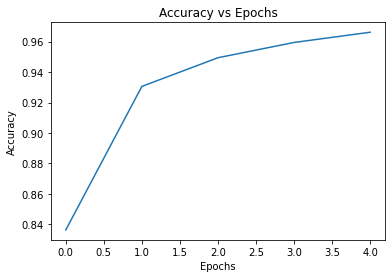

In [18]:
# Accuracy vs Epochs plot

acc_plot = historyFrame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy");

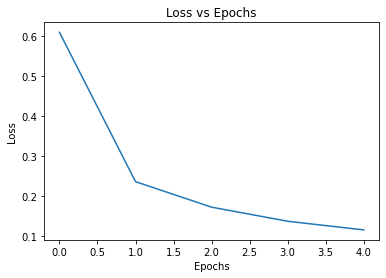

In [19]:
# Loss vs Epochs plot

acc_plot = historyFrame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss");

## Evaluate the model


Now we are going to see how well our network has learned by evaluating its performance on a
held out test set. We are also going to be
putting our network into action by getting its
predictions on unseen input data.  
Running *model.evaluate* 
will iterate over the test set and calculate the loss and the metrics
on that test set. So for example, if we had defined cross-entropy
loss function when we compiled the model, as well as an accuracy metric, then this loss function and this metric will be evaluated on the test set and returned
by the *model.evaluate* call. If we had included more metrics then they would all
just be returned by *model.evaluate*. Hopefully, if our model
has trained well, then these loss or
metric values won't be too far off what we achieved
on the training set. 

In [20]:
test_loss, test_accuracy = CNNModel.evaluate(scaled_test_images, test_labels, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/1 - 2s - loss: 0.0692 - accuracy: 0.9661
Test loss: 0.11263225589469075
Test accuracy: 0.9660999774932861


## Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

If we want to use
our trained model to get predictions on unseen data, then we use the
*model.predict* method. This method doesn't take
any labels of course, it just takes in an
array of inputs.  
*Model.predict* will then return the outputs of the network
for these given inputs.  

In [21]:
# get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = CNNModel.predict(random_test_images)

In [22]:
len(predictions)

4

In [23]:
predictions[0]

array([8.7168673e-06, 2.7467468e-04, 1.4628185e-04, 4.5822620e-05,
       1.7883043e-05, 4.4326059e-04, 6.0708699e-05, 1.1101486e-05,
       9.9621767e-01, 2.7737997e-03], dtype=float32)

The array of output
predictions is a two-dimensional
array, the first dimension will be four, which matches the number of
examples we're getting predictions for and
the second dimension will be ten for the
number of classes.  
This is because the network is a multi-class
classification model where our final layer has ten neurons and
softmax activation. And
the loss-function is a 
categorical cross entropy.  
Each row of this array is the network output
for that data input. The output layer is a
softmax layer, remember, so each layer is a set of
output probabilities emitted by the softmax function and you can see how they add up
to one in each case. Let's see which class the
model is predicting for each example.

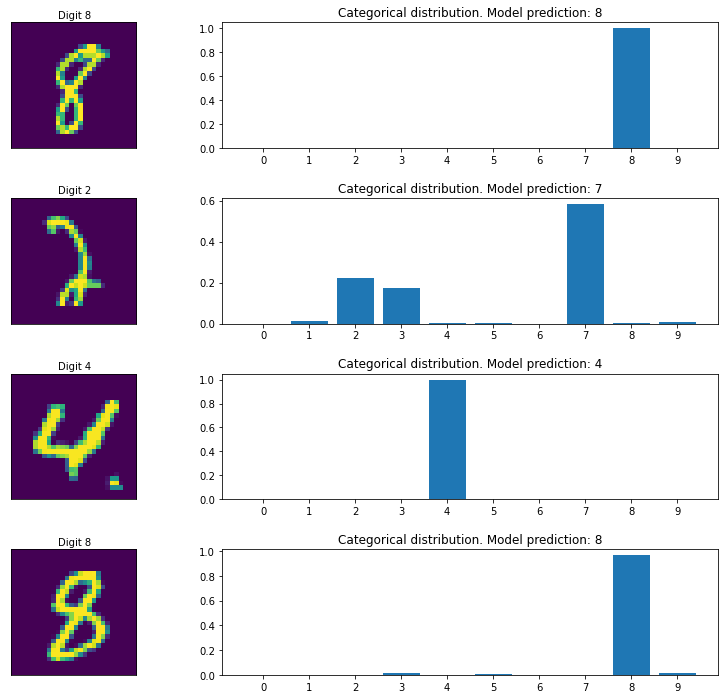

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

This was a first example of building a Neural Network using Tensorflow and Keras.  
With just a simple convolutional network a high accuracy could be reached. The model can be further improved, e.g. by adding other Dense layers before the output one.